## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [2]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [4]:
X.T

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  5],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [5]:
X.shape

(2, 10)

In [6]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

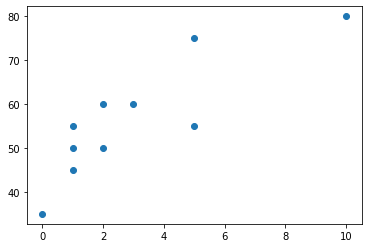

In [7]:
plt.scatter(X[1], y)

In [31]:
y_pred1 = n*X[0] + X[1]*m

NameError: name 'm' is not defined

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.legend()
plt.show()

Уравнение прямой: $y = a*x + b$

In [9]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

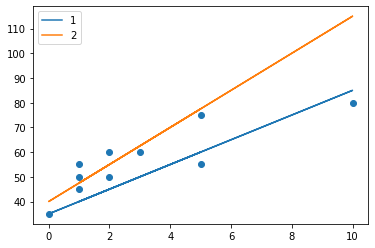

In [10]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [11]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [12]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [13]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [14]:
X.shape

(2, 10)

In [15]:
X.T.shape

(10, 2)

In [16]:
all(X @ y == np.dot(X,y)) #X.dot(y)

True

In [17]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [18]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

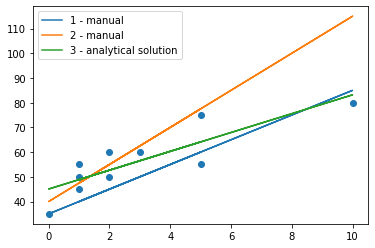

In [19]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [20]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [21]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [22]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [23]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96874999999999)

Градиентный спуск

In [24]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [25]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [30]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [55]:
n = X.shape[1]
alpha = 0.00000001
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(10):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 1e-08        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [1.00000108 0.50000377], MSE = 3047.75


    Насколько я понял задачу нужно подобрать количество итреаций и alpha таким образом что бы получилось  W_new =Initial weights
    За минимальное количество итераций.
     У меня получилось:
      alpha = 0.00000001
       range(10)

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [59]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(10000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.85 5.35], MSE = 3047.75
Iteration #10: W_new = [11.0965715 10.5965715], MSE = 597.49
Iteration #20: W_new = [11.10415569 10.60415569], MSE = 597.49
Iteration #30: W_new = [11.10416665 10.60416665], MSE = 597.49
Iteration #40: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #50: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #60: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #70: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #80: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #90: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #100: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #110: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #120: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #130: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #140: W_new = [11.10416667 10.

Iteration #1660: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1670: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1680: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1690: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1700: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1710: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1720: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1730: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1740: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1750: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1760: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1770: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1780: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1790: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1800: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #1810: W_new = 

Iteration #3000: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3010: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3020: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3030: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3040: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3050: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3060: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3070: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3080: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3090: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3100: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3110: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3120: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3130: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3140: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #3150: W_new = 

Iteration #4470: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4480: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4490: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4500: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4510: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4520: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4530: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4540: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4550: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4560: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4570: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4580: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4590: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4600: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4610: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #4620: W_new = 

Iteration #5980: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #5990: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6000: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6010: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6020: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6030: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6040: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6050: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6060: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6070: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6080: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6090: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6100: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6110: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6120: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #6130: W_new = 

Iteration #7360: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7370: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7380: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7390: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7400: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7410: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7420: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7430: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7440: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7450: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7460: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7470: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7480: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7490: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7500: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #7510: W_new = 

Iteration #8810: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8820: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8830: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8840: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8850: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8860: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8870: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8880: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8890: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8900: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8910: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8920: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8930: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8940: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8950: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #8960: W_new = 